In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from shapely.geometry import Point
import seaborn as sns
import geopandas as gp
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Time-series Statistics

In [2]:
usage = pd.read_csv('./usage_with_date_23July.csv')

In [4]:
usage.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
usage.date = pd.to_datetime(usage.date)

In [11]:
usage_daily = usage.groupby('date').agg({'car_usage':'sum', 'time_usage_hrs':'sum', 'Location':'first'})

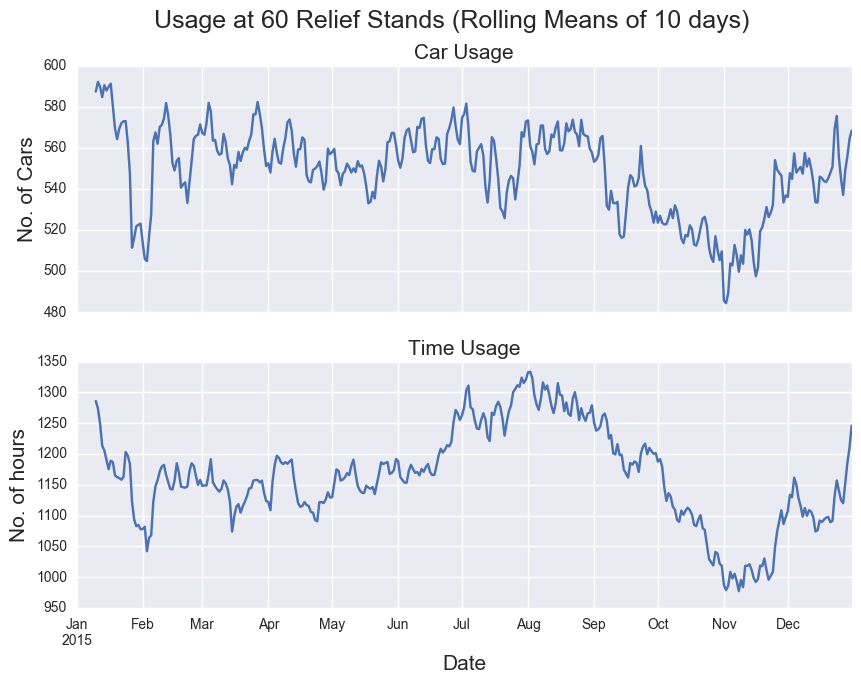

In [44]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
usage_daily.car_usage.rolling(window=10,center=False).mean().plot()
ax1.set_title('Car Usage', size = 15)
ax1.set_ylabel('No. of Cars', size = 15)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(212, sharex=ax1)
usage_daily.time_usage_hrs.rolling(window=10,center=False).mean().plot()
ax2.set_title('Time Usage', size = 15)
ax2.set_ylabel('No. of hours', size = 15)
ax2.set_xlabel('Date', size = 15)
# make these tick labels invisible
# plt.setp(ax2.get_xticklabels(), visible=True)

# share x and y
# ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
# plt.plot(t, s3)
# plt.xlim(0.01, 5.0)
plt.suptitle('Usage at 60 Relief Stands (Rolling Means of 10 days)', size = 18)
plt.show()

In [62]:
print ("Mean {}".format(usage_daily.car_usage.mean()))
print ("Stdev  {}".format(usage_daily.car_usage.std()))
thresholds1 = [usage_daily.car_usage.mean() + 3 * usage_daily.car_usage.std(), 
              usage_daily.car_usage.mean() - 3 * usage_daily.car_usage.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds1))

Mean 549.561643836
Stdev  55.8244861153
3-sigma thresholds 717.04 382.09


In [65]:
print ("Mean {}".format(usage_daily.time_usage_hrs.mean()))
print ("Stdev  {}".format(usage_daily.time_usage_hrs.std()))
thresholds = [usage_daily.time_usage_hrs.mean() + 2 * usage_daily.time_usage_hrs.std(), 
              usage_daily.time_usage_hrs.mean() -  2* usage_daily.time_usage_hrs.std()]
print ("2-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

Mean 1166.62920168
Stdev  135.828359039
2-sigma thresholds 1438.29 894.97


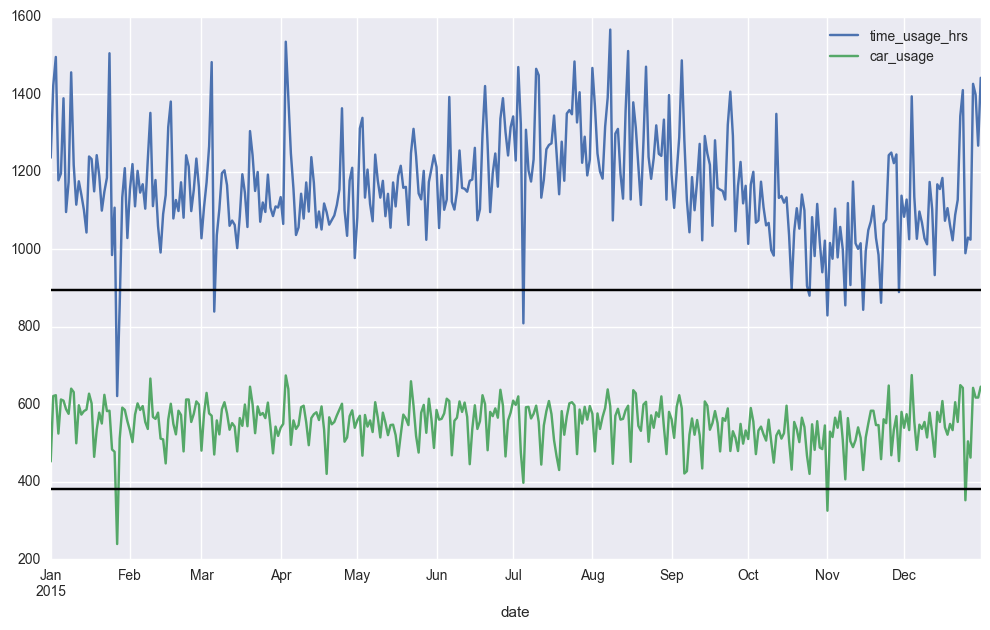

In [66]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
usage_daily.plot(ax=ax)
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [thresholds[1], thresholds[1]], color='k')
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [thresholds1[1], thresholds1[1]], color='k')

# 27 Jan 2015 - Blizzard
# 01 Nov 2015 - NYC MARATHON
# 25 DEc 2015 - Christmas

In [67]:
usage_daily[usage_daily.time_usage_hrs < 894.97]

,Location,time_usage_hrs,car_usage
date,,,
2015-01-27,Park Avenue between E 135th St and E 138th St...,620.800000,239
2015-01-28,Park Avenue between E 135th St and E 138th St...,856.580556,511
2015-03-06,Park Avenue between E 135th St and E 138th St...,838.832222,470
2015-07-05,Park Avenue between E 135th St and E 138th St...,808.556667,397
2015-10-25,Park Avenue between E 135th St and E 138th St...,879.893611,420
2015-11-01,Park Avenue between E 135th St and E 138th St...,828.915000,325
2015-11-08,Park Avenue between E 135th St and E 138th St...,854.889444,406
2015-11-15,Park Avenue between E 135th St and E 138th St...,843.417778,430
2015-11-22,Park Avenue between E 135th St and E 138th St...,861.577778,458


In [59]:
usage_daily[usage_daily.car_usage < 382]

,Location,time_usage_hrs,car_usage
date,,,
2015-01-27,Park Avenue between E 135th St and E 138th St...,620.800000,239
2015-11-01,Park Avenue between E 135th St and E 138th St...,828.915000,325
2015-12-25,Park Avenue between E 135th St and E 138th St...,989.416111,352


# Top Used Relief Stands near Garage

In [68]:
top = [44, 0, 38, 1, 34]

In [71]:
usage_top = usage[usage.relief_stand_idx.isin(top)]

In [73]:
usage_top = usage_top.groupby('date').agg({'car_usage':'sum', 'time_usage_hrs':'sum'})

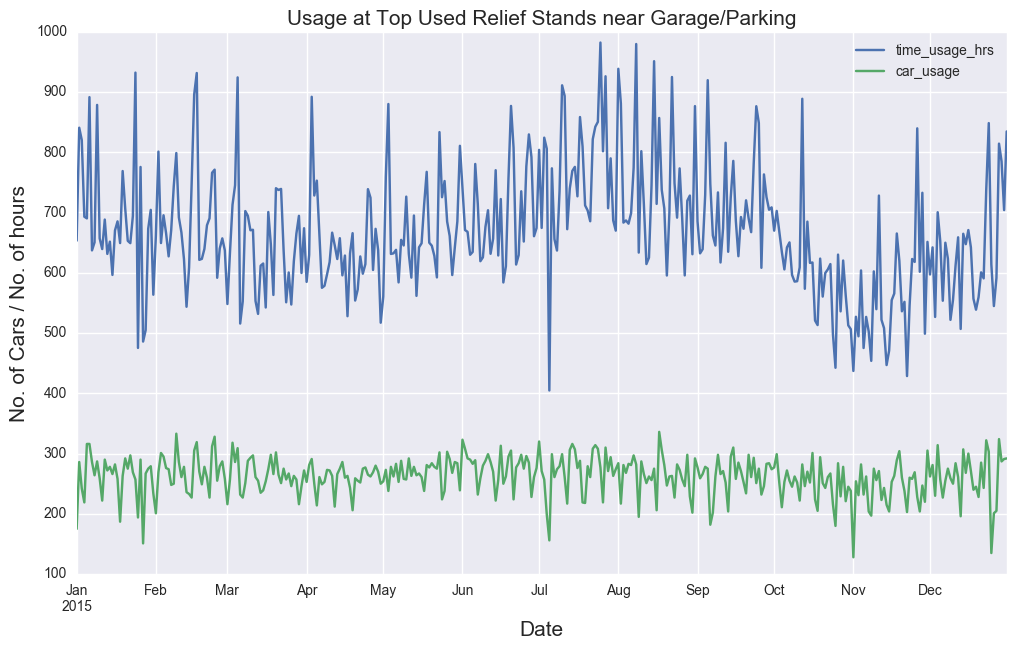

In [96]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
usage_top.plot(ax=ax)
ax.set_title('Usage at Top Used Relief Stands near Garage/Parking', size = 15)
ax.set_ylabel('No. of Cars / No. of hours', size = 15)
ax.set_xlabel('Date', size = 15)

# Blizzard in Jan, 4th july, Marathon in nov, Christmas

In [83]:
top_n = [26, 20, 27, 17, 13]

In [84]:
usage_topn = usage[usage.relief_stand_idx.isin(top_n)]

In [85]:
usage_topn = usage_topn.groupby('date').agg({'car_usage':'sum', 'time_usage_hrs':'sum'})

In [132]:
print ("Mean {}".format(usage_topn.time_usage_hrs.mean()))
print ("Stdev  {}".format(usage_topn.time_usage_hrs.std()))
thresholdsn = [usage_topn.time_usage_hrs.mean() + 3 * usage_topn.time_usage_hrs.std(), 
              usage_topn.time_usage_hrs.mean() - 3 * usage_topn.time_usage_hrs.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholdsn))

Mean 176.334086759
Stdev  30.2629720334
3-sigma thresholds 267.12 85.55


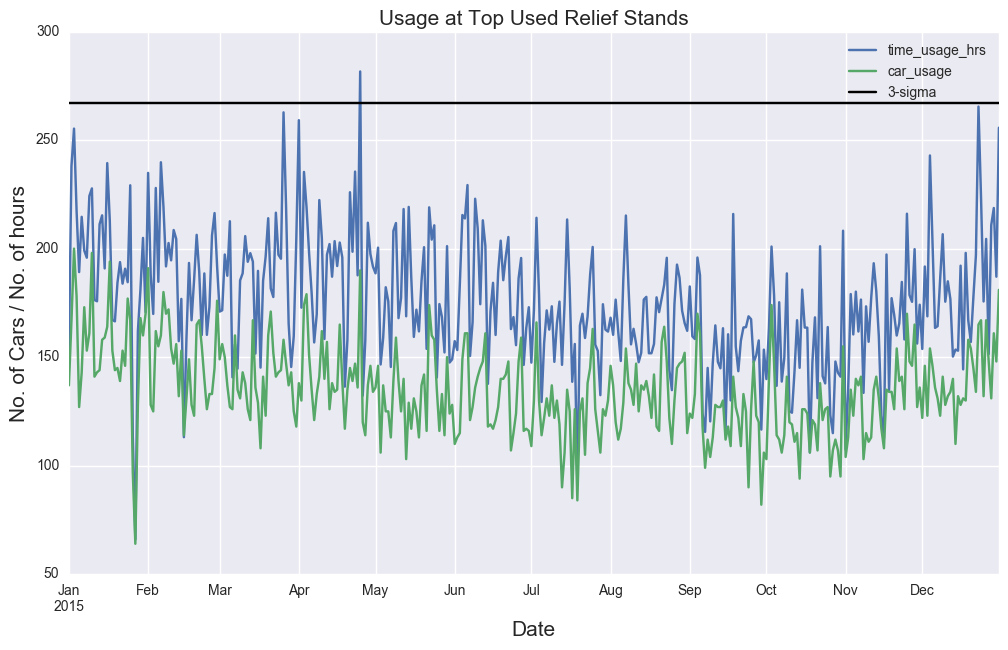

In [135]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
usage_topn.plot(ax=ax)
ax.set_title('Usage at Top Used Relief Stands', size = 15)
ax.set_ylabel('No. of Cars / No. of hours', size = 15)
ax.set_xlabel('Date', size = 15)
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], 
        [thresholdsn[0], thresholdsn[0]], color='k', label = '3-sigma')
plt.legend()

In [136]:
usage_topn[usage_topn.time_usage_hrs > 267]

,time_usage_hrs,car_usage
date,,
2015-04-25,281.639444,190


# Top 5 garage VS Normal

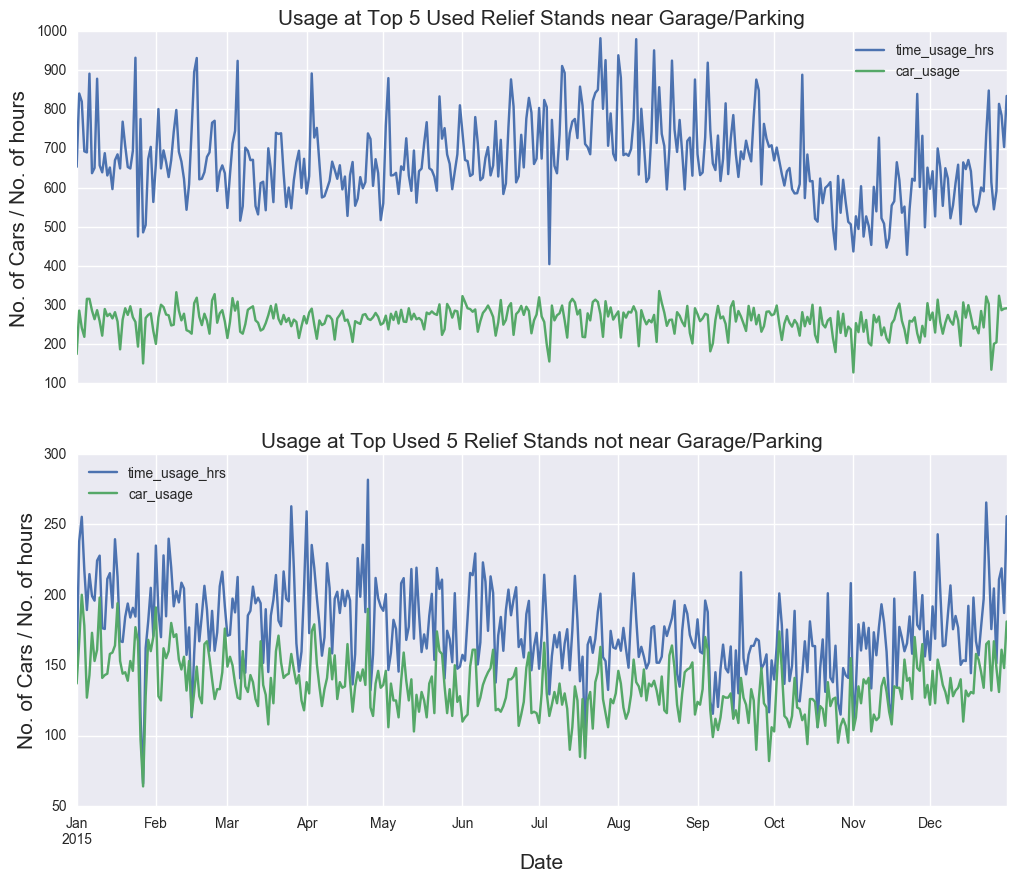

In [131]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(211)
usage_top.plot(ax=ax1)
ax1.set_title('Usage at Top 5 Used Relief Stands near Garage/Parking', size = 15)
ax1.set_ylabel('No. of Cars / No. of hours', size = 15)
# ax1.set_xlabel('Date', size = 15)

ax2 = plt.subplot(212, sharex=ax1)
usage_topn.plot(ax=ax2)
ax2.set_title('Usage at Top Used 5 Relief Stands not near Garage/Parking', size = 15)
ax2.set_ylabel('No. of Cars / No. of hours', size = 15)
ax2.set_xlabel('Date', size = 15)

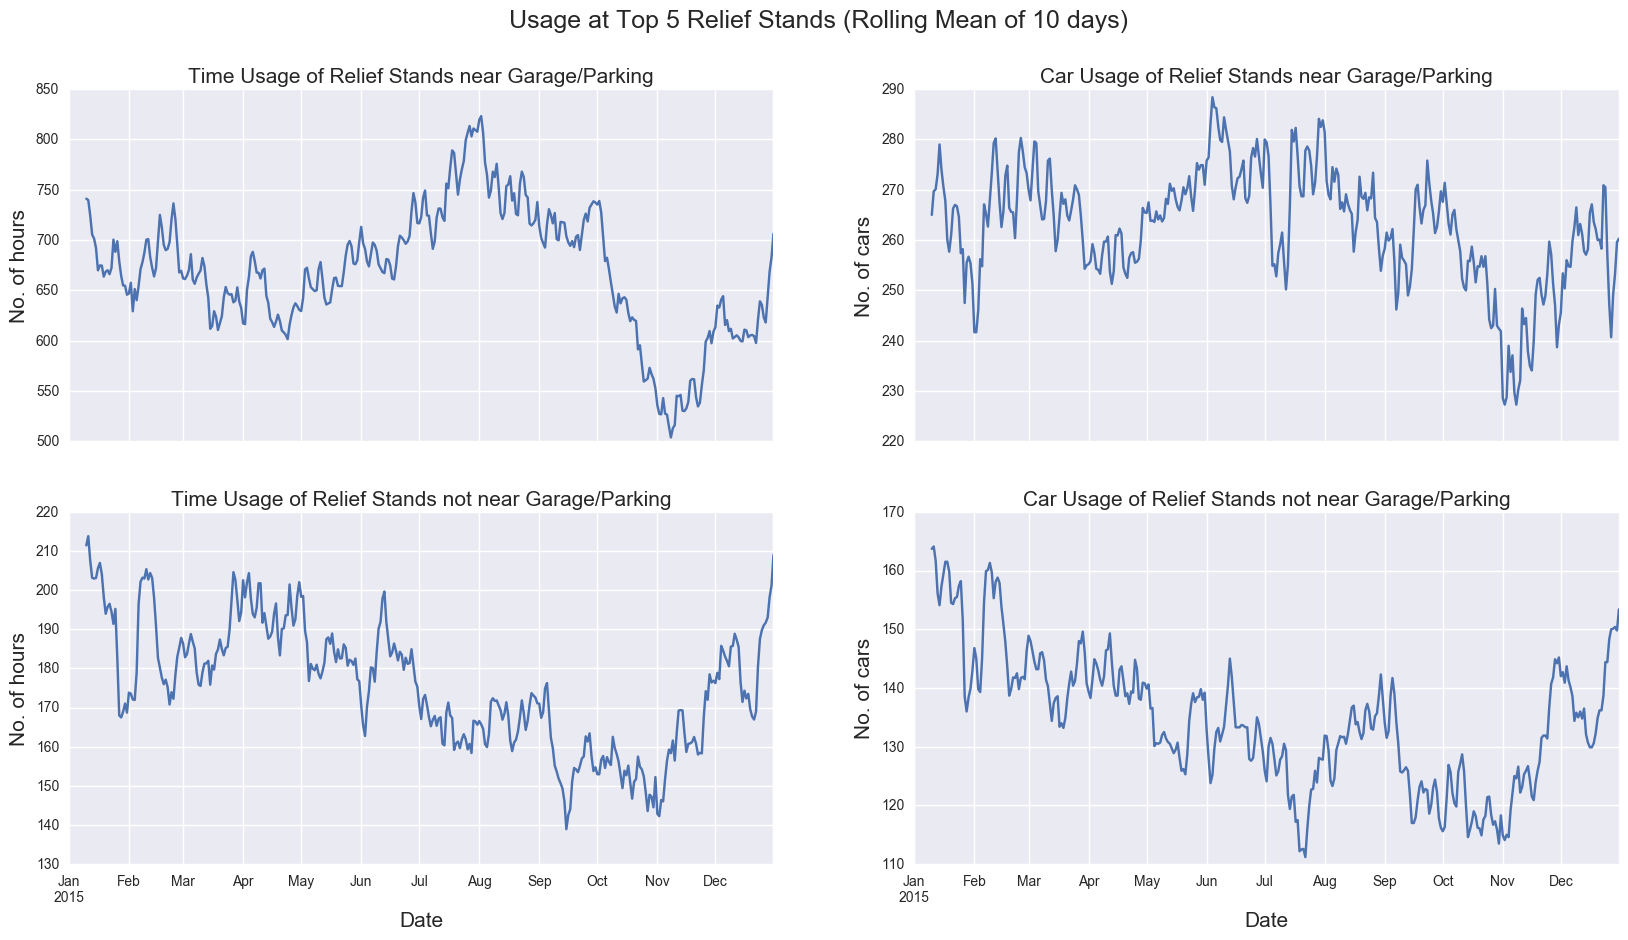

In [144]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
usage_top.time_usage_hrs.rolling(window=10,center=False).mean().plot(ax=ax1)
ax1.set_title('Time Usage of Relief Stands near Garage/Parking', size = 15)
ax1.set_ylabel('No. of hours', size = 15)

ax2 = plt.subplot(223, sharex=ax1)
usage_topn.time_usage_hrs.rolling(window=10,center=False).mean().plot(ax=ax2)
ax2.set_title('Time Usage of Relief Stands not near Garage/Parking', size = 15)
ax2.set_ylabel('No. of hours', size = 15)
ax2.set_xlabel('Date', size = 15)

# fig = plt.figure(figsize=(12,7))
ax3 = plt.subplot(222)
usage_top.car_usage.rolling(window=10,center=False).mean().plot(ax=ax3)
ax3.set_title('Car Usage of Relief Stands near Garage/Parking', size = 15)
ax3.set_ylabel('No. of cars', size = 15)

ax4 = plt.subplot(224, sharex=ax3)
usage_topn.car_usage.rolling(window=10,center=False).mean().plot(ax=ax4)
ax4.set_title('Car Usage of Relief Stands not near Garage/Parking', size = 15)
ax4.set_ylabel('No. of cars', size = 15)
ax4.set_xlabel('Date', size = 15)

plt.suptitle("Usage at Top 5 Relief Stands (Rolling Mean of 10 days)", size = 18)

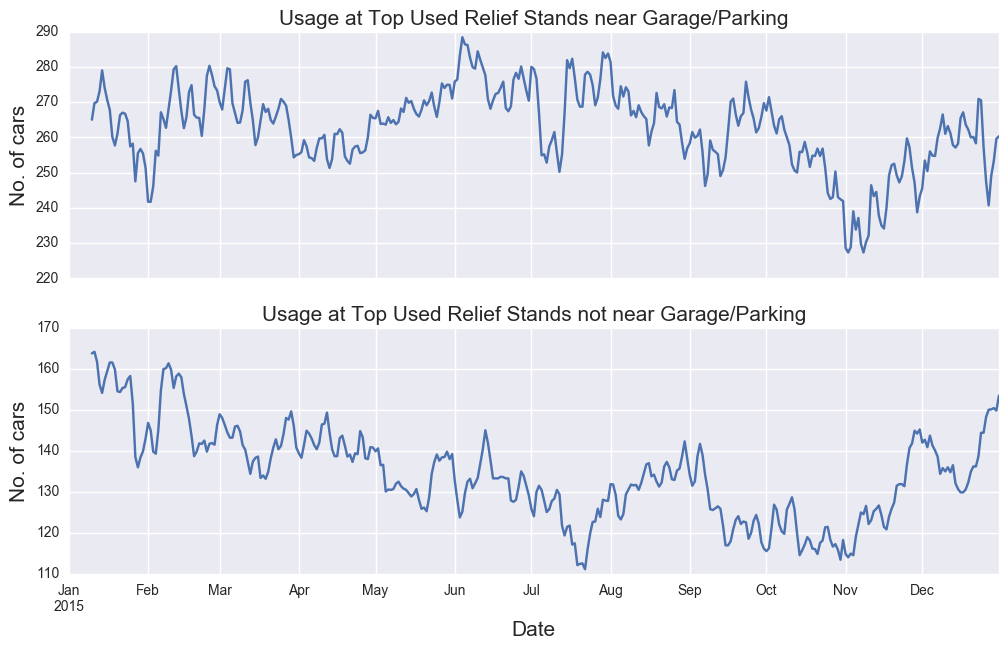

# Top Used

In [104]:
t = [44, 0, 38, 1, 34, 26, 20, 27, 17, 13]

In [105]:
usage_t = usage[usage.relief_stand_idx.isin(t)]

In [106]:
usage_t = usage_t.groupby('date').agg({'car_usage':'sum', 'time_usage_hrs':'sum'})

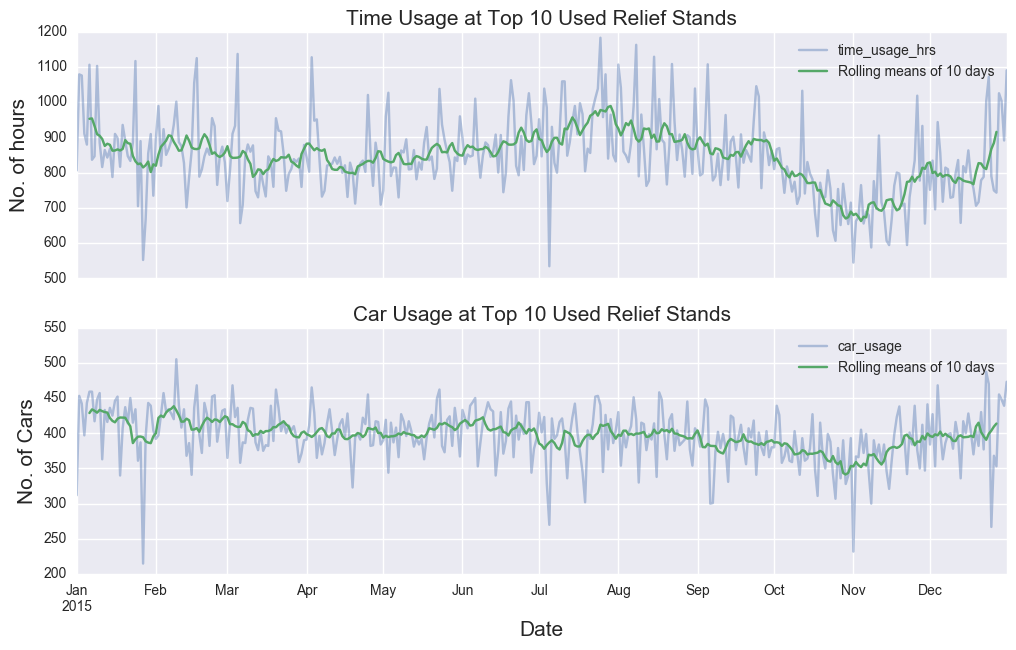

In [127]:
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(211)
usage_t.time_usage_hrs.rolling(window=1,center=True).mean().plot(ax=ax1, alpha = 0.4)
usage_t.time_usage_hrs.rolling(window=10,center=True).mean().plot(ax=ax1, label = 'Rolling means of 10 days')
ax1.set_title('Time Usage at Top 10 Used Relief Stands', size = 15)
ax1.set_ylabel('No. of hours', size = 15)
plt.legend()

ax2 = plt.subplot(212, sharex=ax1)
usage_t.car_usage.rolling(window=1,center=True).mean().plot(ax=ax2, alpha = 0.4)
usage_t.car_usage.rolling(window=10,center=True).mean().plot(ax=ax2, label = 'Rolling means of 10 days')

ax2.set_title('Car Usage at Top 10 Used Relief Stands', size = 15)
ax2.set_ylabel('No. of Cars', size = 15)
ax2.set_xlabel('Date', size = 15)
plt.legend()

# Least Used

In [146]:
least = [54, 24, 9, 2, 3, 37, 47, 22, 51, 50]
usage_least = usage[usage.relief_stand_idx.isin(least)]

In [147]:
usage_least = usage_least.groupby('date').agg({'car_usage':'sum', 'time_usage_hrs':'sum'})

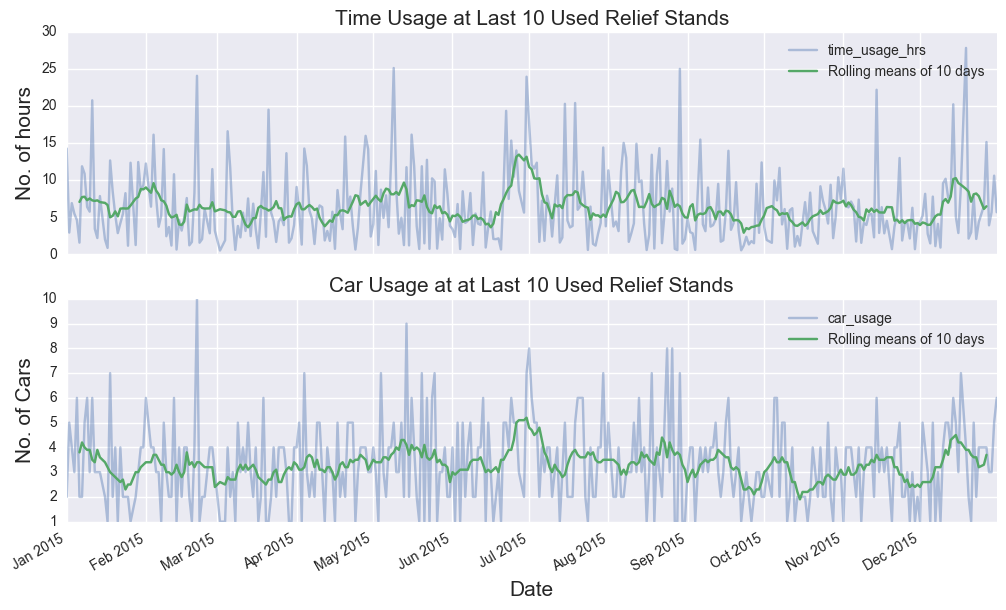

In [149]:
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(211)
usage_least.time_usage_hrs.rolling(window=1,center=True).mean().plot(ax=ax1, alpha = 0.4)
usage_least.time_usage_hrs.rolling(window=10,center=True).mean().plot(ax=ax1, label = 'Rolling means of 10 days')
ax1.set_title('Time Usage at Last 10 Used Relief Stands', size = 15)
ax1.set_ylabel('No. of hours', size = 15)
plt.legend()

ax2 = plt.subplot(212, sharex=ax1)
usage_least.car_usage.rolling(window=1,center=True).mean().plot(ax=ax2, alpha = 0.4)
usage_least.car_usage.rolling(window=10,center=True).mean().plot(ax=ax2, label = 'Rolling means of 10 days')

ax2.set_title('Car Usage at at Last 10 Used Relief Stands', size = 15)
ax2.set_ylabel('No. of Cars', size = 15)
ax2.set_xlabel('Date', size = 15)
plt.legend()

In [150]:
print ("Mean {}".format(usage_least.time_usage_hrs.mean()))
print ("Stdev  {}".format(usage_least.time_usage_hrs.std()))
thresholdsl = [usage_least.time_usage_hrs.mean() + 3 * usage_least.time_usage_hrs.std(), 
              usage_least.time_usage_hrs.mean() - 3 * usage_least.time_usage_hrs.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholdsl))

Mean 6.32537670148
Stdev  5.03838114141
3-sigma thresholds 21.44 -8.79


In [151]:
usage_least[usage_least.time_usage_hrs > 21]

,time_usage_hrs,car_usage
date,,
2015-02-21,24.051111,10
2015-05-09,25.101111,5
2015-06-30,23.927222,7
2015-08-29,24.984444,7
2015-11-14,22.171667,6
2015-12-19,27.808333,4


In [155]:
usage_rs =usage.groupby('relief_stand_idx').agg({'car_usage':'mean', 'time_usage_hrs':'mean'})

In [156]:
usage_rs.car_usage.sum()

571.8013505758498

In [ ]:
usage_rs